In [74]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease/heart.csv


In [75]:
# useful lib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',None)
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import statsmodels.formula.api as smf
from sklearn.metrics import roc_curve, roc_auc_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics 
from sklearn.model_selection import GridSearchCV
import xgboost
import catboost as ctb

In [76]:
data = pd.read_csv('../input/heart-disease/heart.csv')

In [77]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [78]:
data.shape

(303, 14)

In [79]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


- age - age in years
- sex - sex (1 = male; 0 = female)
- cp - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 = asymptomatic)
- trestbps - resting blood pressure (in mm Hg on admission to the hospital)
- chol - serum cholestoral in mg/dl
- fbs - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- restecg - resting electrocardiographic results (0 = normal; 1 = having ST-T; 2 = hypertrophy)
- thalach - maximum heart rate achieved
- exang - exercise induced angina (1 = yes; 0 = no)
- oldpeak - ST depression induced by exercise relative to rest
- slope - the slope of the peak exercise ST segment (1 = upsloping; 2 = flat; 3 = downsloping)
- ca - number of major vessels (0-3) colored by flourosopy
- thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
num - the predicted attribute - diagnosis of heart disease (angiographic disease status) (Value 0 = < 50% diameter narrowing; Value 1 = > 50% diameter narrowing)

In [81]:
data['thal'].value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

(array([  2.,   0.,   0.,  18.,   0.,   0., 166.,   0.,   0., 117.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

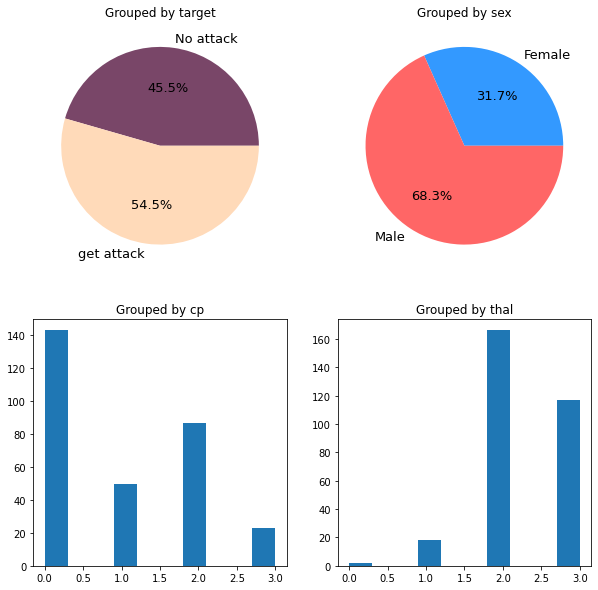

In [82]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
# (0,0)

axes[0,0].set_title('Grouped by target')
axes[0,0].pie(data.groupby('target')['target'].count(),labels=['No attack','get attack'],
              colors= ['#794668','#ffdab9'], autopct='%1.1f%%', textprops={'fontsize':13})

axes[1,0].set_title('Grouped by cp')
axes[1,0].hist(data['cp'])

axes[0,1].set_title('Grouped by sex')
axes[0,1].pie(data.groupby('sex')['sex'].count(), labels=['Female','Male'],colors=['#3399ff','#ff6666'],autopct='%1.1f%%', textprops={'fontsize':13})
axes[1,1].set_title('Grouped by thal')
axes[1,1].hist(data['thal'])


- 54.5% get heart attack
- 68.3% are males 

In [83]:
def visGraphMax(col):
    sns.displot(data=data, x=col, hue= "target")
    df=data.loc[(data['target']== 1)]
    max1=df[col].value_counts().idxmax()
    print("Max of "+col+" is "+max1.astype(str))

Max of target is 1


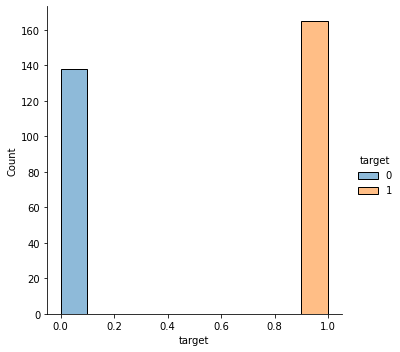

In [84]:
visGraphMax("target")

- Data is quite balenced

Max of sex is 1


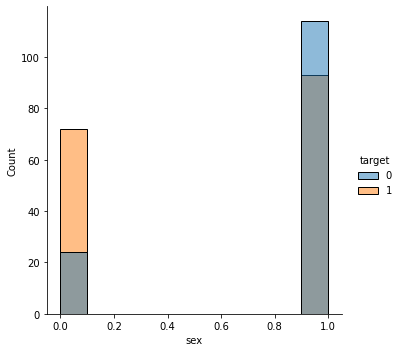

In [85]:
visGraphMax("sex")

- the nember of female getting heart attack is 3 times bigger than the number of female didn't get a heart attack

Max of age is 54


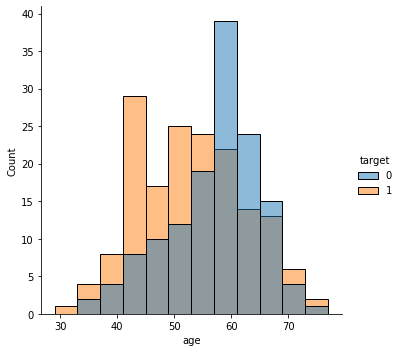

In [86]:
visGraphMax("age")

- Under 60 more persones get a heart attack than over 60 
- Maximum age to get a heart attack is 54 yo


Max of chol is 240


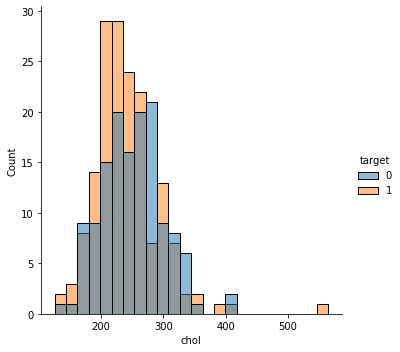

In [87]:
visGraphMax("chol")

- Personnes with a chaol between 200 and 280 tend to has a heart attack
- Personnes with a chaol of 240 are the most categories having heart attack
- Bigger than 500 chol it seems to be an outlier

Max of thal is 2


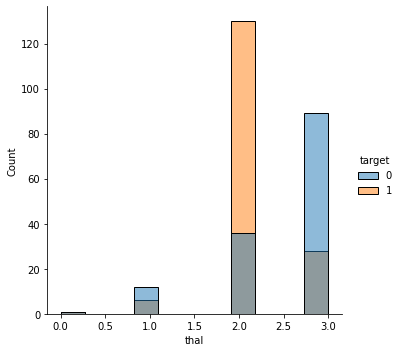

In [88]:
visGraphMax("thal") 

- tahl = 2 more tend to has heart attack
- 0 seem to be outliers

Max of restecg is 1


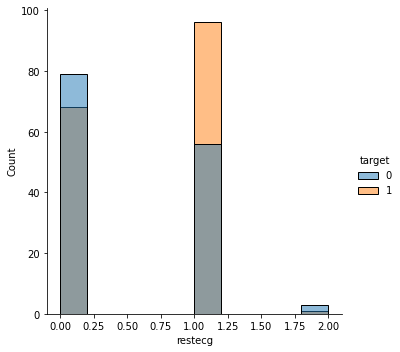

In [89]:
visGraphMax("restecg") 

- 2 seem to be an outliers

Max of exang is 0


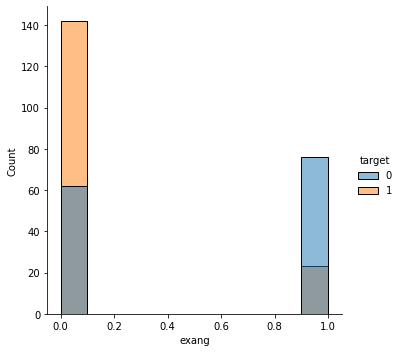

In [90]:
visGraphMax("exang") 

sex, age, chol, thal, resteng, extang

<AxesSubplot:title={'center':'boxplot'}>

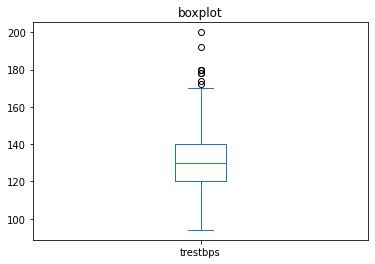

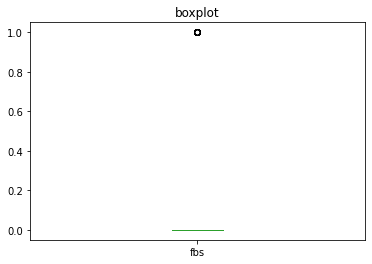

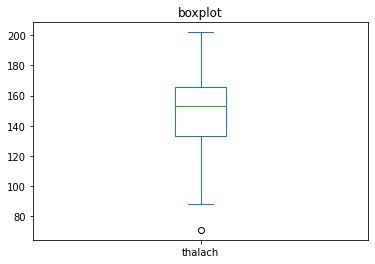

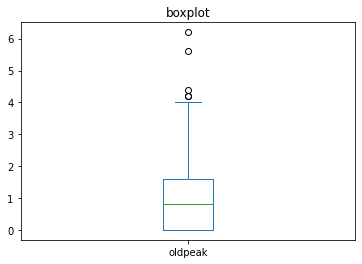

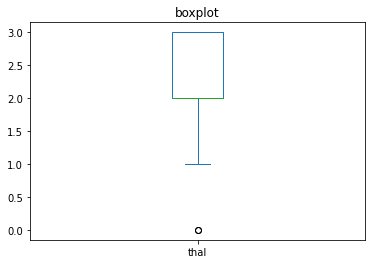

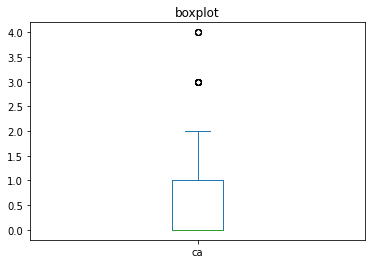

In [91]:
# outliers 

data[['trestbps']].plot(kind='box', title='boxplot')
data[['fbs']].plot(kind='box', title='boxplot')
data[['thalach']].plot(kind='box', title='boxplot')
data[['oldpeak']].plot(kind='box', title='boxplot')
data[['thal']].plot(kind='box', title='boxplot')
data[['ca']].plot(kind='box', title='boxplot')


In [92]:
def deleteOutliers(df,c, bar, choix):
    if(choix == 1):
        indexAge = df[ (df[c] > bar) ].index
    else:
        indexAge = df[ (df[c] < bar) ].index
    df.drop(indexAge , inplace=True)

In [93]:
#deleteOutliers(data,'ca', 2.5, 1)
deleteOutliers(data,'thal', 0.5, 0)
deleteOutliers(data,'oldpeak', 5, 1)
deleteOutliers(data,'thalach', 80, 0)
#deleteOutliers(data,'fbs', 0.9, 1)
deleteOutliers(data,'trestbps', 187, 1)


<AxesSubplot:title={'center':'boxplot'}>

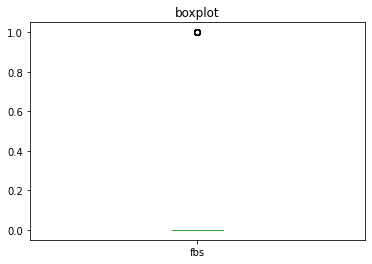

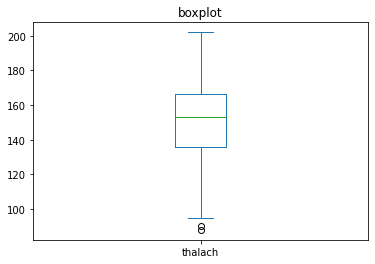

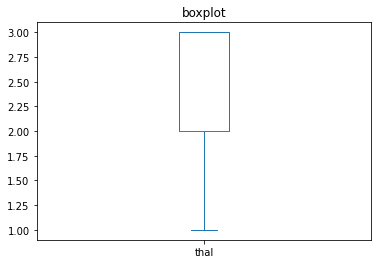

In [94]:
# After cleaning outliers 

#data[['trestbps']].plot(kind='box', title='boxplot')
data[['fbs']].plot(kind='box', title='boxplot')
data[['thalach']].plot(kind='box', title='boxplot')
#data[['oldpeak']].plot(kind='box', title='boxplot')
data[['thal']].plot(kind='box', title='boxplot')
#data[['ca']].plot(kind='box', title='boxplot')


In [95]:
data.shape

(296, 14)

In [96]:
# Multicollinearity
# correlation matrix

def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

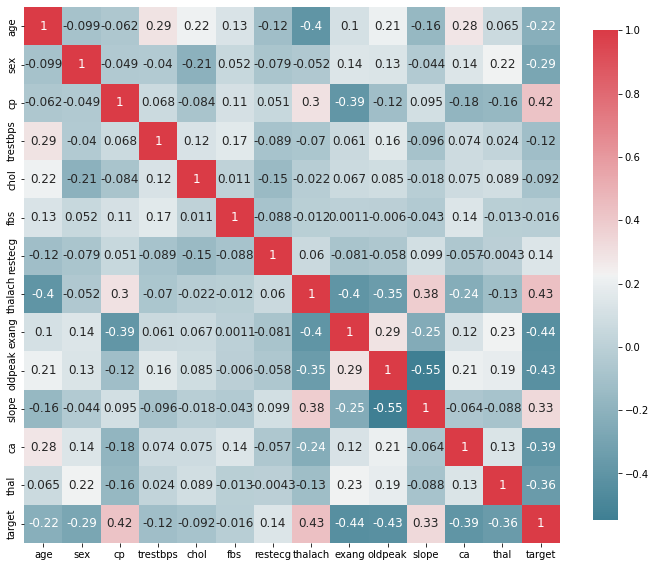

In [97]:
plot_correlation_map(data)

- Not that much correlation between columns just :
thalach, slop = 0.38
thalach, cp = 0.43
thalach and cp both has quit high correlation with target 0.42
- can't reely decide

In [98]:
#Compute VIF data for each independent variable
features =data.drop(columns=['target'])

vif = pd.DataFrame()
vif["features"] = features.columns
vif["vif_Factor"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
vif

,features,vif_Factor
0,age,40.245370
1,sex,3.674851
2,cp,2.443077
3,trestbps,60.899929
4,chol,26.585979
5,fbs,1.260567
6,restecg,2.090604
7,thalach,44.196587
8,exang,2.035624
9,oldpeak,2.991505


- over 10 indicate a mullticoli:
agen trestbps, thalach (1)

In [99]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [100]:
myModel1 = smf.ols(formula = "target ~ age + sex+ cp + trestbps+chol+fbs+restecg+thalach+exang +oldpeak +slope + ca + thal ", data=data)
result1 = myModel1.fit()
result1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     23.42
Date:                Thu, 13 Oct 2022   Prob (F-statistic):           1.08e-37
Time:                        17:04:12   Log-Likelihood:                -104.74
No. Observations:                 296   AIC:                             237.5
Df Residuals:                     282   BIC:                             289.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8475      0.304      2.784      0.006       0.248       1.447
age           -0.0005      0.003     -0.175      0.861      -0.006       0.005
sex           -0.1750      0.048     -3.624      0.000      -0.270      -0.080
cp             0.1098      0.023      4.869      0.000       0.065       0.154
trestbps      -0.0019      0.001     -1.448      0.149      -0.004       0.001
chol          -0.0003      0.000     -0.689      0.491      -0.001       0.001
fbs            0.0244      0.061      0.402      0.688      -0.095       0.144
restecg        0.0553      0.040      1.371      0.172      -0.024       0.135
thalach        0.0030      0.001      2.513      0.013       0.001       0.005
exang         -0.1387      0.052     -2.660      0.008      -0.241      -0.036
oldpeak       -0.0687      0.024     -2.856      0.005      -0.116      -0.021
slope          0.0791      0.042      1.861      0.064      -0.005       0.163
ca            -0.1046      0.022     -4.728      0.000      -0.148      -0.061
thal          -0.1430      0.038     -3.803      0.000      -0.217      -0.069
==============================================================================
Omnibus:                        7.313   Durbin-Watson:                   1.047
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                7.477
Skew:                          -0.388   Prob(JB):                       0.0238
Kurtosis:                       2.949   Cond. No.                     4.82e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- larger than 0.0483 may indicate a strong multicollinearity :
age, trestbps, slope, fps, age  (2)

- Can't reject trestbps it's so important for heart attack predection
- Also fps:
asting glucose levels <70 mg/dL were associated with increased risk of all stroke (hazard ratio 1.06, 95% CI 1.01-1.11) in men and (hazard ratio 1.11, 1.05-1.17) in women. Both low glucose level and impaired fasting glucose should be considered as predictors of risk for stroke and coronary heart disease
- i will train model and test it then i will decide

In [101]:
myModel1 = smf.ols(formula = "target ~ age + sex+ cp + trestbps+chol+fbs+restecg+thalach+exang +oldpeak +slope + ca + thal ", data=data)
result1 = myModel1.fit()
result1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     23.42
Date:                Thu, 13 Oct 2022   Prob (F-statistic):           1.08e-37
Time:                        17:04:12   Log-Likelihood:                -104.74
No. Observations:                 296   AIC:                             237.5
Df Residuals:                     282   BIC:                             289.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8475      0.304      2.784      0.006       0.248       1.447
age           -0.0005      0.003     -0.175      0.861      -0.006       0.005
sex           -0.1750      0.048     -3.624      0.000      -0.270      -0.080
cp             0.1098      0.023      4.869      0.000       0.065       0.154
trestbps      -0.0019      0.001     -1.448      0.149      -0.004       0.001
chol          -0.0003      0.000     -0.689      0.491      -0.001       0.001
fbs            0.0244      0.061      0.402      0.688      -0.095       0.144
restecg        0.0553      0.040      1.371      0.172      -0.024       0.135
thalach        0.0030      0.001      2.513      0.013       0.001       0.005
exang         -0.1387      0.052     -2.660      0.008      -0.241      -0.036
oldpeak       -0.0687      0.024     -2.856      0.005      -0.116      -0.021
slope          0.0791      0.042      1.861      0.064      -0.005       0.163
ca            -0.1046      0.022     -4.728      0.000      -0.148      -0.061
thal          -0.1430      0.038     -3.803      0.000      -0.217      -0.069
==============================================================================
Omnibus:                        7.313   Durbin-Watson:                   1.047
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                7.477
Skew:                          -0.388   Prob(JB):                       0.0238
Kurtosis:                       2.949   Cond. No.                     4.82e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [102]:
# chekin normal distribution
def normalDist(df):
    for ft in df.columns:
        sns.displot(df, x=ft, kind="kde")

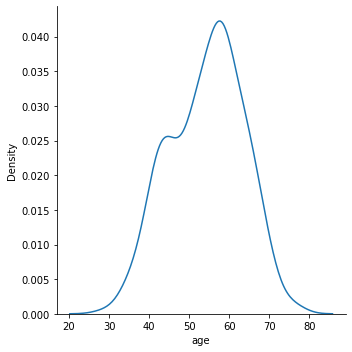

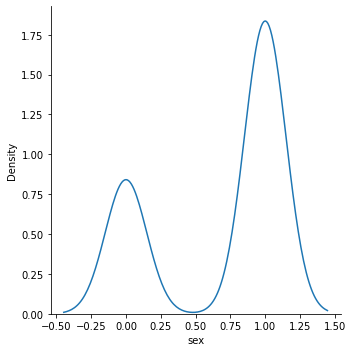

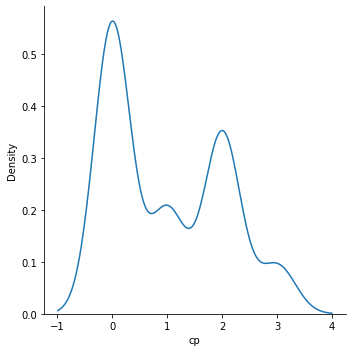

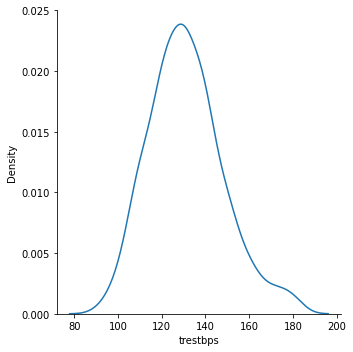

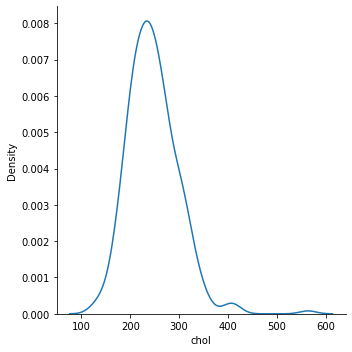

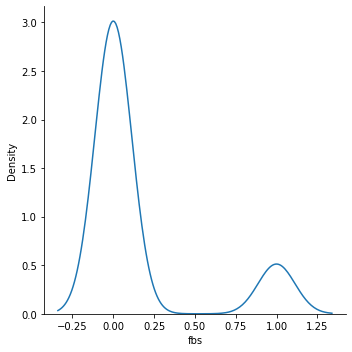

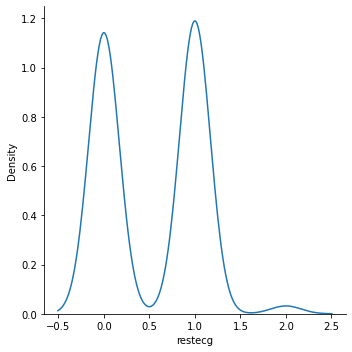

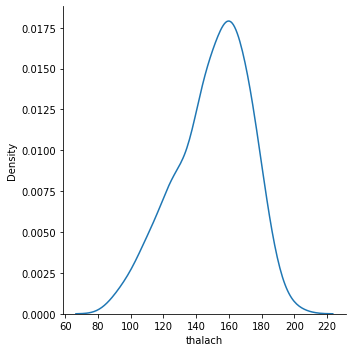

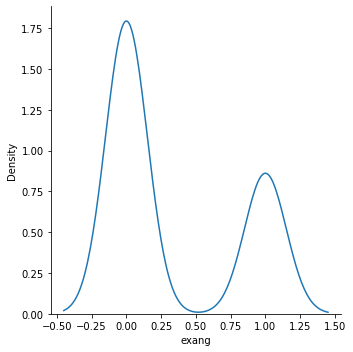

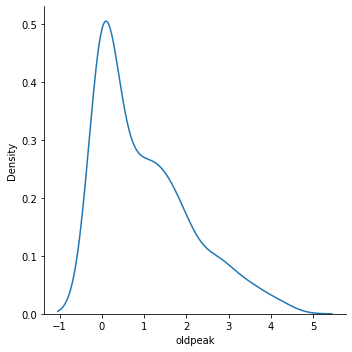

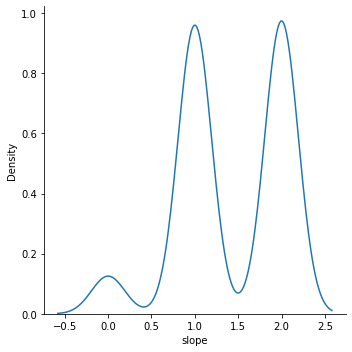

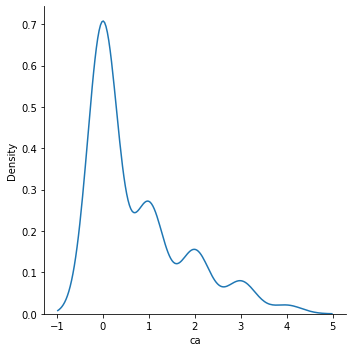

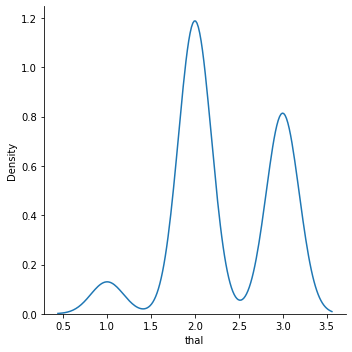

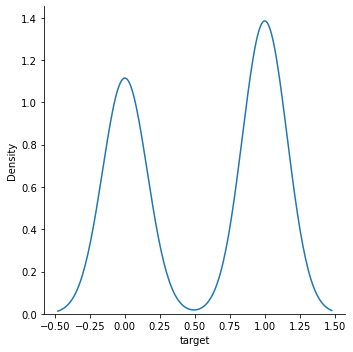

In [103]:
normalDist(data)

In [104]:
def normalizeDist(df, ft):
    df[ft] = np.log(df[ft]+0.5) 

In [105]:
normalizeDist(data, 'cp')

In [106]:
normalizeDist(data, 'ca')

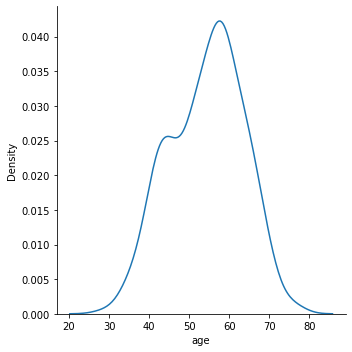

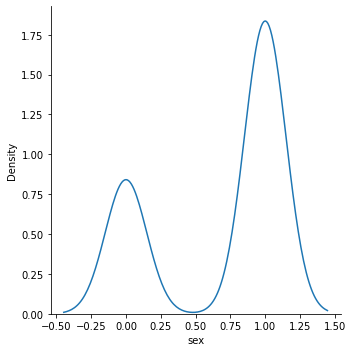

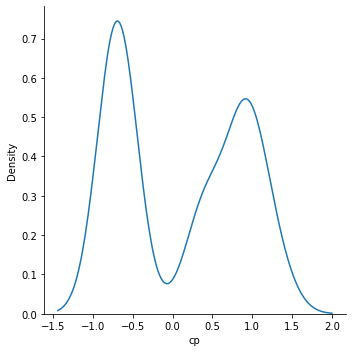

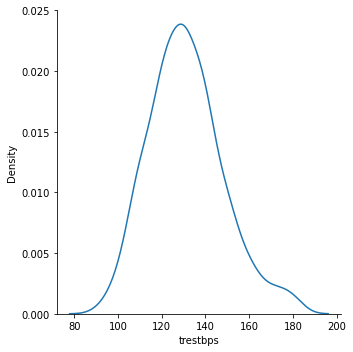

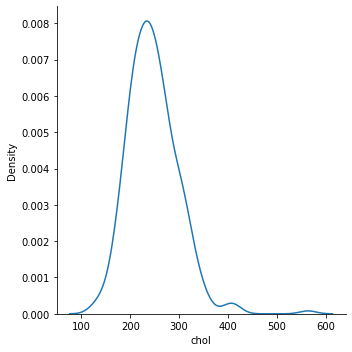

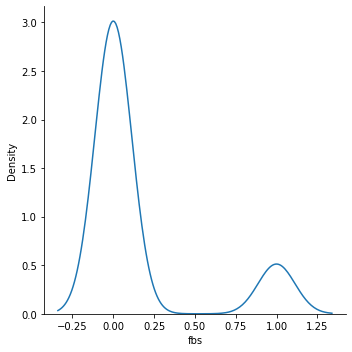

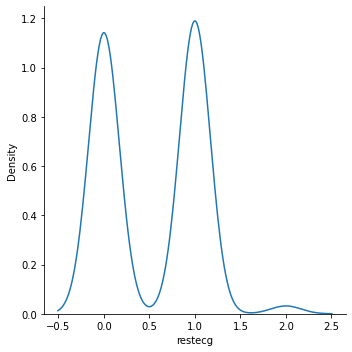

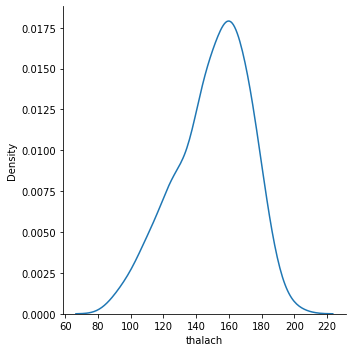

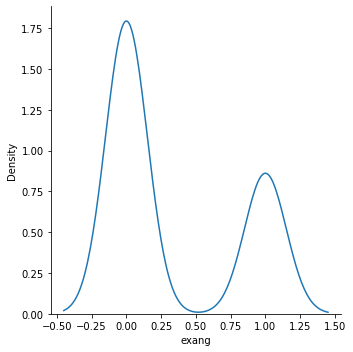

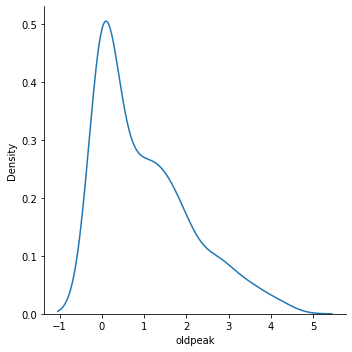

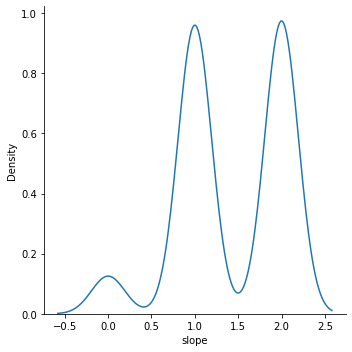

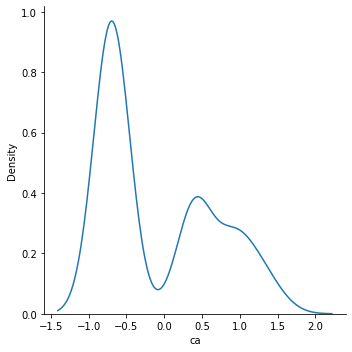

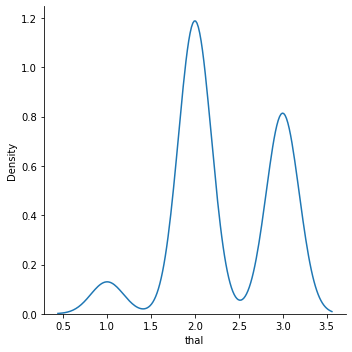

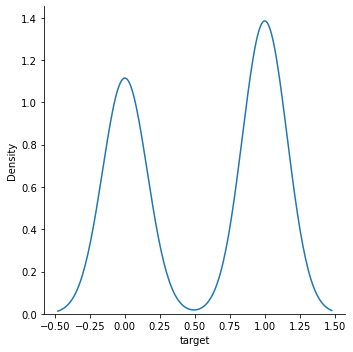

In [107]:
normalDist(data)

In [108]:
features.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [109]:
from sklearn.linear_model import LinearRegression

# Fitting the model
reg_model = LinearRegression()
reg_model.fit(features, data.target)

# Returning the R^2 for the model
heartDes_r2 = reg_model.score(features, data.target)
print('R^2: {0}'.format(heartDes_r2))

R^2: 0.5191106506703704


In [110]:
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

In [111]:
def linear_assumption(model, features, label):
    """
    Linearity: Assumes that there is a linear relationship between the predictors and
               the response variable. If not, either a quadratic term or another
               algorithm should be used.
    """
    print('Assumption 1: Linear Relationship between the Target and the Feature', '\n')
        
    print('Checking with a scatter plot of actual vs. predicted.',
           'Predictions should follow the diagonal line.')
    
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)
    
    # Plotting the actual vs predicted values
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, size=7)
        
    # Plotting the diagonal line
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()

Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


/opt/conda/lib/python3.7/site-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


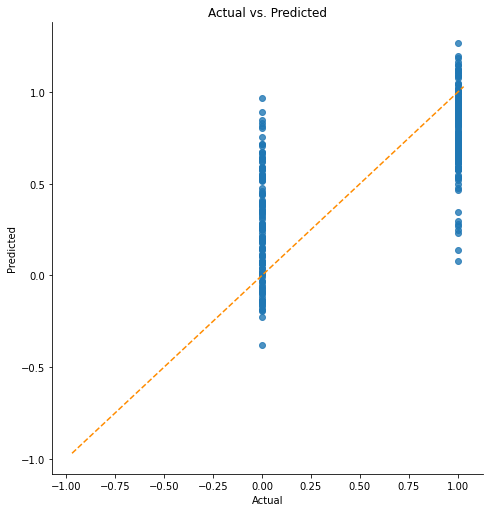

In [112]:
linear_assumption(reg_model, features, data.target)

- We can see there is no linearity features-target
- Will change the model

In [113]:
data.columns
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1.252763,145,233,1,0,150,0,2.3,0,-0.693147,1,1
1,37,1,0.916291,130,250,0,1,187,0,3.5,0,-0.693147,2,1
2,41,0,0.405465,130,204,0,0,172,0,1.4,2,-0.693147,2,1
3,56,1,0.405465,120,236,0,1,178,0,0.8,2,-0.693147,2,1
4,57,0,-0.693147,120,354,0,1,163,1,0.6,2,-0.693147,2,1


In [114]:
def normalize (df):
    features= df.columns
    for column in features:
        mu = df[column].mean()
        sigma = df[column].std()
        df[column] = (df[column] - mu)/sigma

In [115]:
features= data[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'slope', 'ca', 'thal']]
features.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,slope,ca,thal
0,63,1,1.252763,145,233,1,0,150,0,0,-0.693147,1
1,37,1,0.916291,130,250,0,1,187,0,0,-0.693147,2
2,41,0,0.405465,130,204,0,0,172,0,2,-0.693147,2
3,56,1,0.405465,120,236,0,1,178,0,2,-0.693147,2
4,57,0,-0.693147,120,354,0,1,163,1,2,-0.693147,2


# Logistic regretion

In [116]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test= train_test_split(features, data.target, test_size=0.10, random_state=123)
normalize(X_train)
normalize(X_test)
log_reg =LogisticRegression(fit_intercept=True)
scores = cross_val_score(log_reg, X_train, Y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)
scores = pd.Series(scores)
mean_scr=scores.mean()
mean_scr

Cross-Validation Accuracy Scores [0.81481481 0.85185185 0.77777778 0.7037037  0.96296296 0.81481481
 0.84615385 0.84615385 0.80769231 0.65384615]


0.8079772079772078

# Decision tree

Output when max_depth is : 5 and criterion is:  gini
----------------------------------
              precision    recall  f1-score   support

           0       0.59      0.83      0.69        12
           1       0.85      0.61      0.71        18

    accuracy                           0.70        30
   macro avg       0.72      0.72      0.70        30
weighted avg       0.74      0.70      0.70        30

Accuracy score on test:  0.7
Accuracy score on train:  0.94
log_loss :  10.361686224968553
AUC Score :  0.81


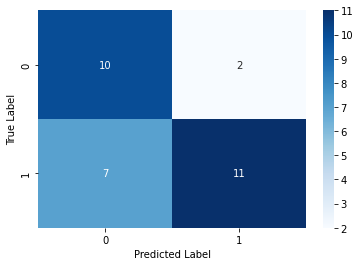



Output when max_depth is : 6 and criterion is:  gini
----------------------------------
              precision    recall  f1-score   support

           0       0.59      0.83      0.69        12
           1       0.85      0.61      0.71        18

    accuracy                           0.70        30
   macro avg       0.72      0.72      0.70        30
weighted avg       0.74      0.70      0.70        30

Accuracy score on test:  0.7
Accuracy score on train:  0.981
log_loss :  10.361686224968553
AUC Score :  0.78


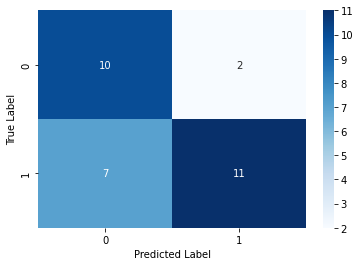



Output when max_depth is : 7 and criterion is:  gini
----------------------------------
              precision    recall  f1-score   support

           0       0.59      0.83      0.69        12
           1       0.85      0.61      0.71        18

    accuracy                           0.70        30
   macro avg       0.72      0.72      0.70        30
weighted avg       0.74      0.70      0.70        30

Accuracy score on test:  0.7
Accuracy score on train:  0.992
log_loss :  10.361686224968553
AUC Score :  0.722


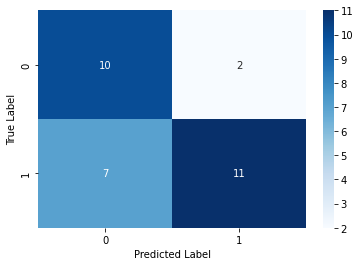



Output when max_depth is : 8 and criterion is:  gini
----------------------------------
              precision    recall  f1-score   support

           0       0.56      0.83      0.67        12
           1       0.83      0.56      0.67        18

    accuracy                           0.67        30
   macro avg       0.69      0.69      0.67        30
weighted avg       0.72      0.67      0.67        30

Accuracy score on test:  0.667
Accuracy score on train:  1.0
log_loss :  11.512978771465574
AUC Score :  0.694


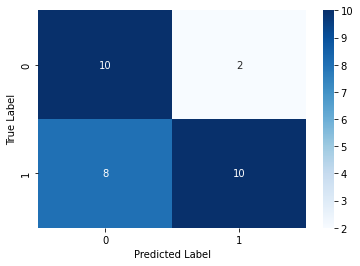



Output when max_depth is : 9 and criterion is:  gini
----------------------------------
              precision    recall  f1-score   support

           0       0.56      0.83      0.67        12
           1       0.83      0.56      0.67        18

    accuracy                           0.67        30
   macro avg       0.69      0.69      0.67        30
weighted avg       0.72      0.67      0.67        30

Accuracy score on test:  0.667
Accuracy score on train:  1.0
log_loss :  11.512978771465574
AUC Score :  0.694


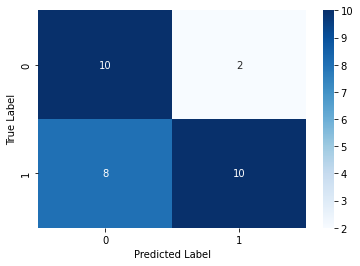

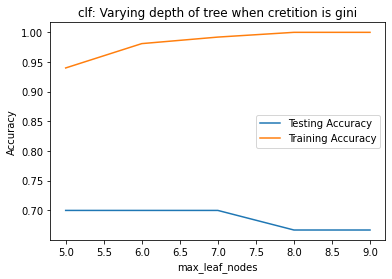

Output when max_depth is : 5 and criterion is:  entropy
----------------------------------
              precision    recall  f1-score   support

           0       0.67      0.83      0.74        12
           1       0.87      0.72      0.79        18

    accuracy                           0.77        30
   macro avg       0.77      0.78      0.76        30
weighted avg       0.79      0.77      0.77        30

Accuracy score on test:  0.767
Accuracy score on train:  0.929
log_loss :  8.059101131974506
AUC Score :  0.806


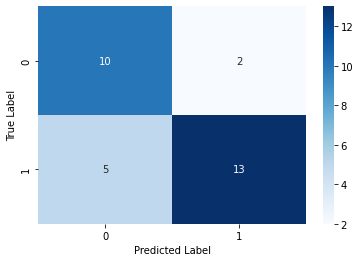



Output when max_depth is : 6 and criterion is:  entropy
----------------------------------
              precision    recall  f1-score   support

           0       0.62      0.83      0.71        12
           1       0.86      0.67      0.75        18

    accuracy                           0.73        30
   macro avg       0.74      0.75      0.73        30
weighted avg       0.76      0.73      0.74        30

Accuracy score on test:  0.733
Accuracy score on train:  0.974
log_loss :  9.210393678471528
AUC Score :  0.796


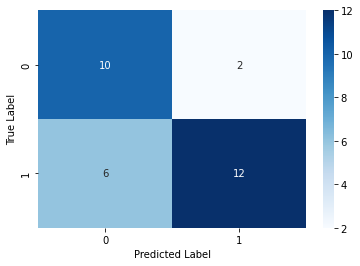



Output when max_depth is : 7 and criterion is:  entropy
----------------------------------
              precision    recall  f1-score   support

           0       0.61      0.92      0.73        12
           1       0.92      0.61      0.73        18

    accuracy                           0.73        30
   macro avg       0.76      0.76      0.73        30
weighted avg       0.79      0.73      0.73        30

Accuracy score on test:  0.733
Accuracy score on train:  0.992
log_loss :  9.210367025223855
AUC Score :  0.764


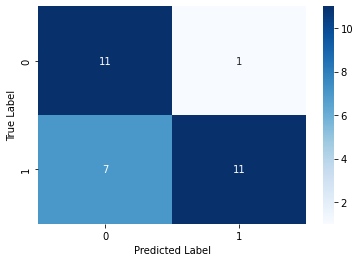



Output when max_depth is : 8 and criterion is:  entropy
----------------------------------
              precision    recall  f1-score   support

           0       0.65      0.92      0.76        12
           1       0.92      0.67      0.77        18

    accuracy                           0.77        30
   macro avg       0.79      0.79      0.77        30
weighted avg       0.81      0.77      0.77        30

Accuracy score on test:  0.767
Accuracy score on train:  1.0
log_loss :  8.059074478726833
AUC Score :  0.792


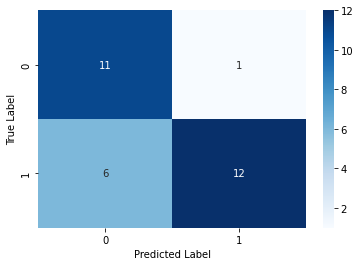



Output when max_depth is : 9 and criterion is:  entropy
----------------------------------
              precision    recall  f1-score   support

           0       0.65      0.92      0.76        12
           1       0.92      0.67      0.77        18

    accuracy                           0.77        30
   macro avg       0.79      0.79      0.77        30
weighted avg       0.81      0.77      0.77        30

Accuracy score on test:  0.767
Accuracy score on train:  1.0
log_loss :  8.059074478726833
AUC Score :  0.792


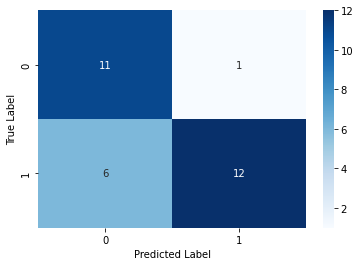

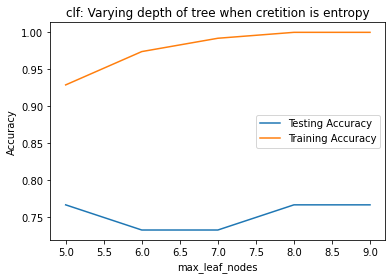

In [117]:
criterion= ['gini','entropy']
max_depth= np.arange(5, 10)
acrTest= []
acrTrain= []
for i in criterion:
    for j in max_depth:
        criterion= ['gini','entropy']
max_depth= np.arange(5, 10)
acrTest= []
acrTrain= []
for i in criterion:
    for j in max_depth:
        print("Output when max_depth is :", j, "and criterion is: ",i)
        print('----------------------------------')
    
        model = DecisionTreeClassifier(criterion = i ,max_leaf_nodes=150, random_state=0, max_depth = j).fit(X_train, Y_train)
    #predicting for our test data
        y_pred = model.predict(X_test)
    #generating classification report
        print(classification_report(Y_test, y_pred))
            #importing libraries to check model performance
        test_acrcy= round((model.score(X_test, Y_test)),3)
        train_acrcy= round((model.score(X_train, Y_train)),3)
        print("Accuracy score on test: " , test_acrcy )
        print("Accuracy score on train: ", train_acrcy)
        acrTest.append(test_acrcy)
        acrTrain.append(train_acrcy)

            #printing log loss for the model
            
        print('log_loss : ', log_loss(Y_test, y_pred))
            #let find ROC and AUC score
            #before we calculate roc_auc_score(), we need to find out the  predicted probabilities for test data.
        pred_prob = pd.DataFrame(model.predict_proba(X_test))
            #we'll also add the actual label
        test_result = pd.DataFrame( { 'actual' : Y_test})
        test_result = test_result.reset_index()
        test_result['prob_0'] = pred_prob.iloc[:,0:1]
        test_result['prob_1'] = pred_prob.iloc[:,1:2]
            #to calculate ROC AUC score we will pass actual class labels and predicted probability
        auc_score = round(metrics.roc_auc_score(test_result.actual,   test_result.prob_1),3)
        print("AUC Score : ",auc_score)
            #generating confusion matrix
        cf_matrix = confusion_matrix(Y_test, y_pred)
        sns.heatmap(cf_matrix, annot=True, cmap='Blues')
        plt.ylabel("True Label")
        plt.xlabel("Predicted Label")
        plt.show()
        print("\n")



  
  
  
                                  
    title = 'clf: Varying depth of tree when cretition is '+i
    plt.title(title)
    plt.plot(max_depth, acrTest, label = 'Testing Accuracy')
    plt.plot(max_depth,acrTrain, label = 'Training Accuracy')
    plt.legend()
    plt.xlabel('max_leaf_nodes')
    plt.ylabel('Accuracy')
    plt.show()
    acrTest=[]
    acrTrain=[]
     

- Best one with entropy: gini and creterion :5

In [118]:
model = DecisionTreeClassifier(criterion = 'gini' ,max_leaf_nodes=200, random_state=0, max_depth =6 ).fit(X_train, Y_train)
    #predicting for our test data
y_pred = model.predict(X_test)
    #generating classification report
tree_score= round((model.score(X_test, Y_test)),3)
tree_score

0.7

In [119]:
clf=RandomForestClassifier(n_estimators=40)  #Creating a random forest with 100 decision trees
clf.fit(X_train, Y_train)  #Training our model
Y_pred=clf.predict(X_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.8333333333333334


In [120]:
from sklearn.model_selection import GridSearchCV
param_grid = { 
    'n_estimators': [250,300,310,320,330,340,350,360,370],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_clf = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5)
CV_clf.fit(X_train, Y_train)
print(CV_clf.best_params_)

{'max_features': 'sqrt', 'n_estimators': 300}


In [121]:
clf=RandomForestClassifier(n_estimators=250,max_features= 'auto')  #Creating a random forest with 100 decision trees
clf.fit(X_train, Y_train)  #Training our model
Y_pred=clf.predict(X_test)  #testing our model
random_score= metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy:", random_score)  #Measuring the acc

Accuracy: 0.8666666666666667


# XGboost

In [122]:
xg_model = xgboost.XGBClassifier()
xg_model.fit(X_train, Y_train)
# make predictions for test data
y_pred = xg_model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
xg_accuracy = accuracy_score(Y_test, predictions)
#"Accuracy: %.2f%%"(xg_accuracy * 100.0)
print("Accuracy: ", (xg_accuracy ))

Accuracy:  0.9333333333333333


In [123]:
cbc=ctb.CatBoostClassifier(n_estimators=800,eval_metric='Accuracy',od_wait=200, learning_rate=0.1,
                              bootstrap_type='Bernoulli',metric_period=100,max_depth = 8)
cbc.fit(X_train, Y_train)  #Training our model
Y_pred=cbc.predict(X_test)
cat_accuracy = accuracy_score(Y_test, Y_pred)
cat_accuracy

0:	learn: 0.7518797	total: 52ms	remaining: 41.5s
100:	learn: 1.0000000	total: 198ms	remaining: 1.37s
200:	learn: 1.0000000	total: 353ms	remaining: 1.05s
300:	learn: 1.0000000	total: 506ms	remaining: 838ms
400:	learn: 1.0000000	total: 670ms	remaining: 667ms
500:	learn: 1.0000000	total: 825ms	remaining: 493ms
600:	learn: 1.0000000	total: 983ms	remaining: 325ms
700:	learn: 1.0000000	total: 1.14s	remaining: 162ms
799:	learn: 1.0000000	total: 1.3s	remaining: 0us


0.8

# COMPARING accuracies

In [124]:
print("Accuracy logistic regression without cross validation: ",round((heartDes_r2 * 100.0),2)," %")
print("Accuracy logistic regression with cross validation: ",round((mean_scr * 100.0),2)," %")
print("Accuracy decision trees: ",round((tree_score * 100.0),2)," %")
print("Accuracy random forest : ",round((random_score * 100.0),2)," %")
print("Accuracy xgboost: ",round((xg_accuracy * 100.0),2)," %")
print("Accuracy cat boost: ",round((cat_accuracy * 100.0),2)," %")

Accuracy logistic regression without cross validation:  51.91  %
Accuracy logistic regression with cross validation:  80.8  %
Accuracy decision trees:  70.0  %
Accuracy random forest :  86.67  %
Accuracy xgboost:  93.33  %
Accuracy cat boost:  80.0  %
